##                                                          Employees

Take care of your employees:
 A drastic thing happened and ABCXYZ123 Technical Solutions have lost one of their important employees. The company is now very concerned about the health of their employees and would want you to find that set of employees who are in need or may be in need of treatment, taking into account multiple attributes that are already stored in the database. So buckle up the wellness of your employees is in your hand.


The objective of the problem:
 To predict values “treatment” attribute from the given features of the Test data.

->The predictions are to be written to a CSV file along with ID which is the unique identifier for each tuple.
->Please upload the submission file to get a score.
->Note note that the training data is only for creating your data model and all predictions are to be made as per serial numbers on the test file.

The description of the data attributes is as below:

**1.Timestamp:** <br>
**2.Age:**   <br>
**3.Gender:** <br>
**4.Country:**
**5.state:** If you live in the United States, which state or territory do you live in? <br>
**6.self_employed:** Are you self-employed? <br>
**7.family_history:** Do you have a family history of mental illness? <br>
**8 treatment:** Does he or she really needs treatment. <br>
**9.work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?<br>
**10.no_employees:** How many employees does your company or organization have?<br>
**11.remote_work:** Do you work remotely (outside of an office) at least 50% of the time? <br>
**12.tech_company:** Is your employer primarily a tech company/organization?<br>
**13.benefits:** Does your employer provide mental health benefits?<br>
**14.care_options:** Do you know the options for mental health care your employer provides?<br>
**15.wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?<br>
**16.seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?<br>
**17.anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?<br>
**18.leave:** How easy is it for you to take medical leave for a mental health condition?<br>
**19.mental_health_consequence:** Do you think that discussing a mental health issue with your employer would have negative consequences? <br>
**20.phys_health_consequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?<br>
**21.coworkers:** Would you be willing to discuss a mental health issue with your coworkers?<br>
**22.supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?<br>
**23.mental_health_interview:** Would you bring up a mental health issue with a potential employer in an interview?<br>
**24.phys_health_interview:** Would you bring up a physical health issue with a potential employer in an interview?<br>
**25.mental_vs_physical:** Do you feel that your employer takes mental health as seriously as physical health?<br>
**26.obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?<br>
**27.comments:** Any additional notes or comments.<br>



**In this notebook, I tried to unleash useful insights using the "Testing" dataset and by building "Stacked -Ensemble" model by combining the power of best performing Machine-Learning algorithms.**

## 1.Importing Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling & Pre-processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

# Model Validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import StratifiedKFold

# Machine-Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 


from scipy import stats


## 2.Loading Dataset

In [2]:
dt=pd.read_csv("training.csv")

In [3]:
dt.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,27/08/14 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,27/08/14 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,27/08/14 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,27/08/14 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,27/08/14 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
print(dt.shape)

(1048, 28)


## 3.Data Analysing & Preprocessing:

In [5]:
 #Checking Imbalance data:
dt['treatment'].value_counts()

No     536
Yes    512
Name: treatment, dtype: int64

**Since the data is sufficiently balanced, no sampling techniques will be performed.**

In [6]:
dt.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

## Checking the counts of the values in the columns below for a brief overview of data ,which helps in further analysis.

In [7]:
dt['Country'].value_counts()

United States             644
United Kingdom            153
Canada                     64
Germany                    37
Australia                  18
Netherlands                18
Ireland                    13
France                     11
India                       8
New Zealand                 6
Sweden                      6
Switzerland                 6
Italy                       6
Brazil                      5
Poland                      5
Israel                      4
Belgium                     4
South Africa                4
Austria                     3
Bulgaria                    3
Mexico                      3
Russia                      3
Finland                     2
Denmark                     2
Singapore                   2
Portugal                    2
Uruguay                     1
Spain                       1
Slovenia                    1
Norway                      1
Latvia                      1
Thailand                    1
Romania                     1
Costa Rica

In [8]:
dt['state'].value_counts()

CA    123
WA     60
NY     49
TN     39
TX     38
OR     26
PA     26
OH     24
IL     21
MA     20
IN     20
MI     19
MN     17
GA     12
VA     12
MO     12
WI     10
FL     10
NC     10
CO      9
AZ      7
MD      7
UT      6
KY      5
OK      5
SC      4
DC      4
AL      4
IA      4
CT      4
SD      3
NH      3
KS      3
NV      3
NJ      3
NM      2
VT      2
NE      2
WY      2
ME      1
LA      1
RI      1
MS      1
ID      1
WV      1
Name: state, dtype: int64

In [9]:
dt['leave'].value_counts()

Don't know            466
Somewhat easy         218
Very easy             176
Somewhat difficult    107
Very difficult         81
Name: leave, dtype: int64

In [10]:
dt['seek_help'].value_counts()

No            534
Don't know    309
Yes           205
Name: seek_help, dtype: int64

In [11]:
dt['care_options'].value_counts()

No          422
Yes         363
Not sure    263
Name: care_options, dtype: int64

In [12]:
dt['wellness_program'].value_counts()

No            692
Yes           193
Don't know    163
Name: wellness_program, dtype: int64

In [13]:
 dt['coworkers'].value_counts()

Some of them    651
No              209
Yes             188
Name: coworkers, dtype: int64

In [14]:
  dt['supervisor'].value_counts()

Yes             439
No              320
Some of them    289
Name: supervisor, dtype: int64

In [15]:
   dt['obs_consequence'].value_counts()

No     902
Yes    146
Name: obs_consequence, dtype: int64

In [16]:
 dt['phys_health_interview'].value_counts()

Maybe    461
No       419
Yes      168
Name: phys_health_interview, dtype: int64

In [17]:
 dt['mental_vs_physical'].value_counts()

Don't know    471
Yes           297
No            280
Name: mental_vs_physical, dtype: int64

In [18]:
 dt['self_employed'].value_counts()

No     906
Yes    124
Name: self_employed, dtype: int64

In [19]:
  dt['family_history'].value_counts()

No     643
Yes    405
Name: family_history, dtype: int64

In [20]:
dt['work_interfere'].value_counts()

Sometimes    386
Never        178
Rarely       144
Often        104
Name: work_interfere, dtype: int64

In [21]:
 dt['Age'].value_counts()

 29             73
 32             64
 33             63
 26             63
 27             61
 31             57
 28             56
 30             56
 34             52
 35             49
 25             48
 23             41
 24             38
 37             36
 36             31
 38             30
 39             26
 40             26
 43             23
 22             20
 42             17
 21             15
 41             15
 45              9
 19              9
 44              8
 46              7
 18              7
 50              5
 48              5
 49              4
 51              4
 20              4
 54              3
 57              3
 56              3
 55              3
 47              2
 8               1
 99999999999     1
-1726            1
 53              1
 58              1
 60              1
 61              1
 62              1
 65              1
 329             1
-29              1
 5               1
Name: Age, dtype: int64

### ->From the above analysis on 'Age'(Numerical) column shows that there are 'outliers' which need to be fixed.Process will be done in the further steps.

In [22]:
dt.isna().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

### ->From the above analysis on all the columns(Numerical & Categorical) , shows that there are 'Null values' which need to be fixed.Values will be imputed in the further steps.

In [23]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1048 non-null   object
 14  care_opt

## 4. Exploratory Data Analysis:

**Distribution of Treatment(target variable)**

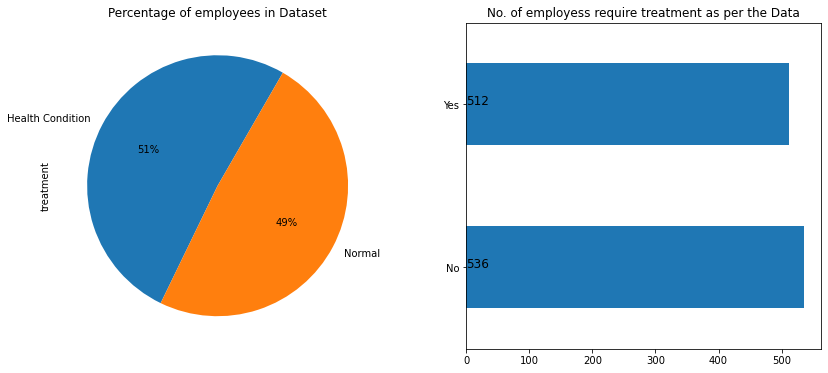

In [24]:
# Plotting attrition of employees:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['treatment'].value_counts().plot.pie( x="health reatment" ,y ='no.of employees', 
                   autopct = "%1.0f%%",labels=["Health Condition","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of employees in Dataset')

ax2 = dt["treatment"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["treatment"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of employess require treatment as per the Data')
plt.show()

The dataset is balanced(negligible difference) ,since we have 512 treatment required employees 
,while 536 Employees not in need of a treatment.

**Distribution of Age**

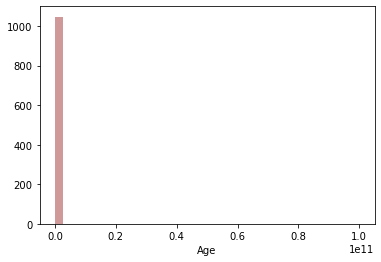

In [25]:

sns.distplot(dt['Age'].dropna(),kde=False,color='darkred',bins=40)

**From the above plot we can say that age is totally Skewed,because of the outliers,will be fixed in the coming steps.**

## Q)work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

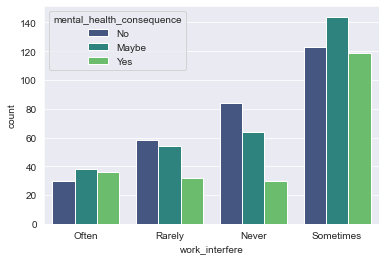

In [26]:

sns.set_style('darkgrid')
sns.countplot(x='work_interfere',hue='mental_health_consequence',data=dt,palette='viridis')

**From the above plot we can say a count of 120 employess say sometimes 'Yes'the mental health will interfere with work.**

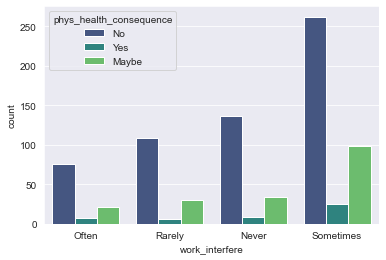

In [27]:
sns.set_style('darkgrid')
sns.countplot(x='work_interfere',hue='phys_health_consequence',data=dt,palette='viridis')

**From the above plot we can say a count of 100 employess say sometimes 'Yes'the physical health will interfere with work,but 250 say sometimes 'NO' that physical consequences dont interfere with work & below count 50 say that 'often' it interferes with work.With this we can understand that people with 'mental consequences' have work interfernces.**

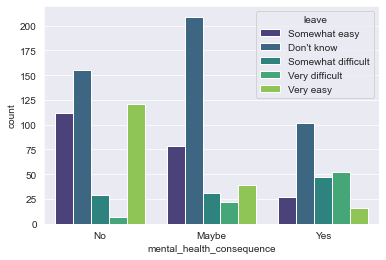

In [28]:
sns.set_style('darkgrid')
sns.countplot(x='mental_health_consequence',hue='leave',data=dt,palette='viridis')

**->From the above plot we can say that,count of 150 say that its not easy to get a leave due to mental health consequences.**

## Checking the Unique values in the categorical columns below for a brief overview of data ,which helps in further analysis.

In [29]:
dt.Gender.unique()



array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr'], dtype=object)

In [30]:
dt.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [31]:
# Summary statistics of categorical columns:
dt.describe(include =[np.object])

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1048,1048,1048,636,1030,1048,1048,812,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1048,1048,132
unique,679,45,42,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,128
top,27/08/14 15:23,Male,United States,CA,No,No,No,Sometimes,Jun-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,8,518,644,123,906,643,536,386,245,733,...,466,424,773,651,439,835,461,471,902,5


In [32]:
# Summary statistics of numerical columns:
dt.describe(include =[np.number])

,S.No,Age
count,1048.000000,1.048000e+03
mean,524.500000,9.541988e+07
std,302.675844,3.089010e+09
min,1.000000,-1.726000e+03
25%,262.750000,2.700000e+01
50%,524.500000,3.100000e+01
75%,786.250000,3.600000e+01
max,1048.000000,1.000000e+11


In [33]:
#Replacing gender names with three commonly used labels,this will reduce the dimensionality while encoding procedure.

dt['Gender']=dt['Gender'].replace(['Female','M','Male','male','female','m','Male-ish','maile',
                                   'Trans-female','Cis Female','F','something kinda male?',
                                   'Cis Male','Woman','f','Mal','Male (CIS)','queer/she/they',
                                   'non-binary','Femake','woman','Make','Nah','All','Enby',
                                   'fluid','Genderqueer','Female','Androgyne','Agender',
                                   'cis-female/femme','Guy (-ish) ^_^','male leaning androgynous',
                                   'Male','Man','Trans woman','msle','Neuter','Female (trans)',
                                   'queer','Female (cis)','Mail','cis male','A little about you',
                                   'Malr'],
                                  ['female','male','male','male','female','male','transgender','transgender',
  'transgender','transgender','female','transgender',
  'transgender','female','female','male','transgender','transgender',
  'transgender','transgender','female','transgender','transgender','transgender','transgender',
  'transgender','transgender','female','transgender','transgender',
  'transgender','transgender','transgender',
  'male','male','transgender','transgender','transgender','transgender',
  'transgender','transgender','transgender','transgender','transgender',
 'male'],inplace=False)
                                  
                                  
                               
                                  
                                  

In [34]:
dt.Gender.unique() 

array(['female', 'male', 'transgender', 'Female ', 'Male '], dtype=object)

In [35]:
dt['Gender']=dt['Gender'].replace(['Female ', 'Male '],['female','male'],inplace=False)

In [36]:
dt.Gender.unique() 


array(['female', 'male', 'transgender'], dtype=object)

### Q)phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
### Q)mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

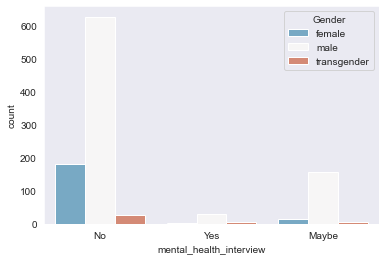

In [37]:
sns.set_style('dark')
sns.countplot(x='mental_health_interview',hue='Gender',data=dt,palette='RdBu_r')

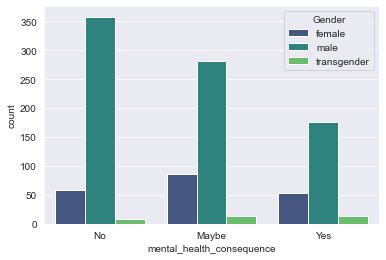

In [38]:
sns.set_style('darkgrid')
sns.countplot(x='mental_health_consequence',hue='Gender',data=dt,palette='viridis')

**From the above two plots we can say that majority of them from differnt Gender say 'No' to bringing up their mental health issues with a potential employeer.While,there is a highest recording for 'may be' when it comes to 'physical health issues'.**

## Q)seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

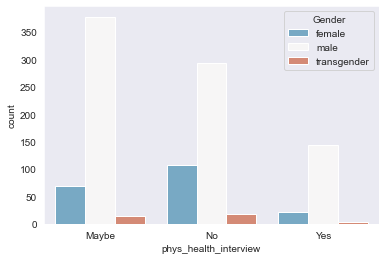

In [39]:
sns.set_style('dark')
sns.countplot(x='phys_health_interview',hue='Gender',data=dt,palette='RdBu_r')

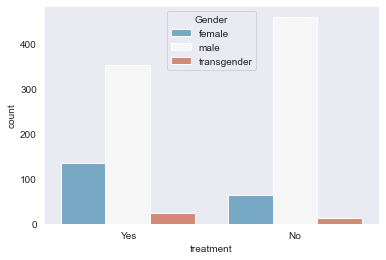

In [40]:
sns.set_style('dark')
sns.countplot(x='treatment',hue='Gender',data=dt,palette='RdBu_r')

In [41]:
dt.shape

(1048, 28)

In [42]:
#Dropping column no_employees:Removing below columns as the s.no is unique feature which can be converted into and index,
#but I choose to keep the indexes default and drop this column.While no_employess has no relation with health of the other employee
#in domain view,so dropping this column.State is being dropped as country itself is enough to locate and the 'comments'
#feature has comments which are not related to health of an employee and insufficient,so it will be dropped too.

dt.drop(['S.No','self_employed','Country','Timestamp','no_employees','state','comments'],axis='columns',inplace=True)

In [43]:
dt.head()

,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,No,Yes,Often,No,Yes,Yes,Not sure,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,No,No,Rarely,No,No,Don't know,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,No,No,Rarely,No,Yes,No,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,Yes,Yes,Often,No,Yes,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,No,No,Never,Yes,Yes,Yes,No,Don't know,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [44]:
dt.shape

(1048, 21)

In [45]:
age_mode=dt['Age'].mode()
age_mode

0    29
dtype: int64

In [46]:
dt['Age']=dt['Age'].replace([99999999999,-1726,329,-29],[29,29,29,29],inplace=False)

In [47]:
 dt['Age'].value_counts()

29    77
32    64
26    63
33    63
27    61
31    57
28    56
30    56
34    52
35    49
25    48
23    41
24    38
37    36
36    31
38    30
40    26
39    26
43    23
22    20
42    17
41    15
21    15
19     9
45     9
44     8
46     7
18     7
48     5
50     5
51     4
20     4
49     4
54     3
55     3
56     3
57     3
47     2
8      1
65     1
62     1
53     1
58     1
60     1
61     1
5      1
Name: Age, dtype: int64

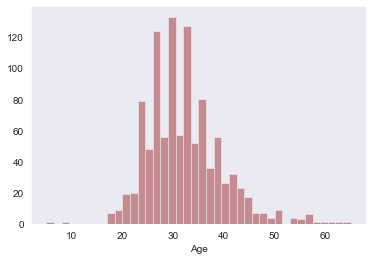

In [48]:

sns.distplot(dt['Age'].dropna(),kde=False,color='darkred',bins=40)

**From the above plot we can say that Age is now distributed normally ,before it was totatlly left skewed.
As the outliers are removed the distribution looks perfect for further processing.**

In [49]:
dt['treatment']=dt['treatment'].replace(['Yes','No'],[1,0],inplace=False)

In [50]:
dt['work_interfere']=dt['work_interfere'].fillna(value='Nan',inplace=False)

In [51]:
dt['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'Nan'], dtype=object)

In [52]:
dt.head()


,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,No,1,Often,No,Yes,Yes,Not sure,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,No,0,Rarely,No,No,Don't know,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,No,0,Rarely,No,Yes,No,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,Yes,1,Often,No,Yes,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,No,0,Never,Yes,Yes,Yes,No,Don't know,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [53]:
dt.shape

(1048, 21)

In [54]:
dt.isna().sum()

Age                          0
Gender                       0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [55]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1048 non-null   int64 
 1   Gender                     1048 non-null   object
 2   family_history             1048 non-null   object
 3   treatment                  1048 non-null   int64 
 4   work_interfere             1048 non-null   object
 5   remote_work                1048 non-null   object
 6   tech_company               1048 non-null   object
 7   benefits                   1048 non-null   object
 8   care_options               1048 non-null   object
 9   wellness_program           1048 non-null   object
 10  seek_help                  1048 non-null   object
 11  anonymity                  1048 non-null   object
 12  leave                      1048 non-null   object
 13  mental_health_consequence  1048 non-null   object
 14  phys_hea

In [56]:
## Encoding categorical variables:
dt= pd.get_dummies(dt, drop_first=True)

dt.head()


,Age,treatment,Gender_male,Gender_transgender,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,44,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,1,0,0
3,31,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,31,0,1,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [57]:
dt.shape

(1048, 40)

In [58]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['treatment'],axis=1)
y = dt['treatment']

In [59]:
X.shape

(1048, 39)

In [60]:
X.head()

,Age,Gender_male,Gender_transgender,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,44,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,1,0,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,1,0,0
3,31,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,31,1,0,0,1,0,0,0,1,1,...,0,0,1,0,1,0,1,0,0,0


## 5.Train & Test split of given data:

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [62]:
print('Training Set')
print(X_train.shape)
print(y_train.shape)

print('Test Set')
print(X_test.shape)
print(y_test.shape)

Training Set
(838, 39)
(838,)
Test Set
(210, 39)
(210,)


## 6.Checking Correlation & Feature Importance:

In [63]:
### constant features check and removal if any: 
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [64]:
constant_filter.get_support().sum()

39

In [65]:
constant_list=[not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [66]:
corrmat= X_train.corr()

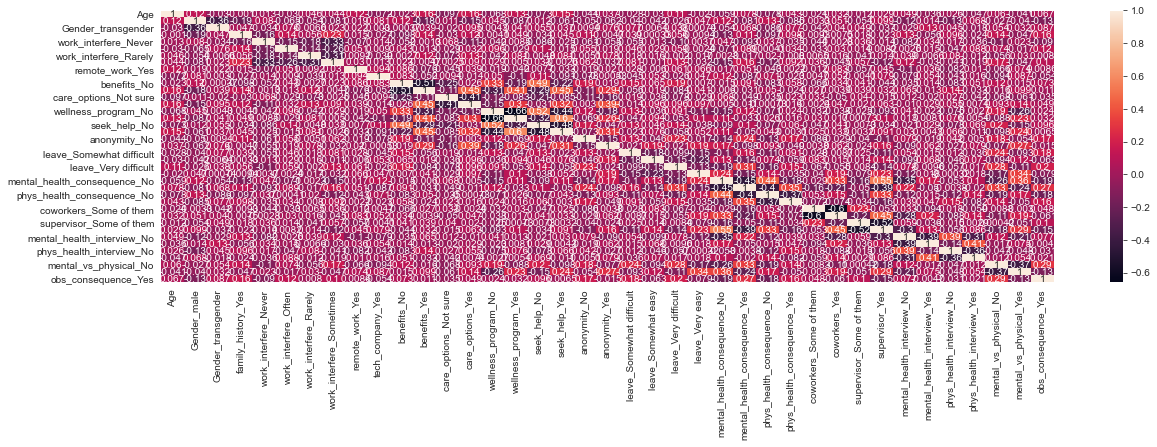

In [67]:
plt.figure(figsize=(20,5))

dataplot=sns.heatmap((corrmat),annot= True ) 
plt.show()

In [68]:
def get_correlation(da ,threshold):
    corr_col= set()
    corrmat= dt.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
                
   
    return corr_col   

In [69]:
corr_features=get_correlation(X_train,0.85)
corr_features

set()

In [70]:
len(corr_features)

0

In [71]:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr= X_test.drop(labels=corr_features,axis=1)

In [72]:
X_train_uncorr.shape,X_test_uncorr.shape

((838, 39), (210, 39))

In [73]:
#Feature grouping and feature importance:
#vertical stacking
corrmat

,Age,Gender_male,Gender_transgender,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
Age,1.000000,0.123115,-0.030419,-0.000995,0.012645,-0.029723,0.045898,0.043799,0.121522,-0.072386,...,0.032314,-0.012090,0.028866,0.048853,-0.035700,0.026249,-0.047078,0.059722,-0.040652,0.066513
Gender_male,0.123115,1.000000,-0.364436,-0.187374,0.080044,-0.065304,-0.053684,-0.080712,0.018569,0.081225,...,0.051177,-0.053854,0.099105,-0.117913,0.014469,-0.129291,0.067570,-0.027199,-0.039987,-0.126371
Gender_transgender,-0.030419,-0.364436,1.000000,0.047061,-0.034294,0.076083,-0.006637,0.022565,0.022063,0.003034,...,0.039711,0.049470,-0.036868,-0.028840,0.129072,0.045062,-0.018259,0.054265,0.032465,0.087201
family_history_Yes,-0.000995,-0.187374,0.047061,1.000000,-0.164467,0.138656,0.055841,0.230170,0.014656,-0.027445,...,-0.007507,0.018184,-0.023255,0.125452,-0.056245,0.095810,-0.023752,0.140940,-0.047006,0.164083
work_interfere_Never,0.012645,0.080044,-0.034294,-0.164467,1.000000,-0.151058,-0.177404,-0.331494,-0.070055,0.013520,...,-0.002751,0.035989,-0.013583,-0.082046,0.034499,0.016866,-0.035729,-0.101244,0.022705,-0.089868
work_interfere_Often,-0.029723,-0.065304,0.076083,0.138656,-0.151058,1.000000,-0.139550,-0.260760,0.050765,0.009020,...,0.029859,0.013651,0.008179,-0.002557,0.014521,-0.046561,0.088499,0.073923,-0.016884,0.121413
work_interfere_Rarely,0.045898,-0.053684,-0.006637,0.055841,-0.177404,-0.139550,1.000000,-0.306239,0.009211,-0.039422,...,0.015509,-0.041413,0.013908,0.038781,-0.006637,0.079766,-0.011978,-0.056444,0.029857,0.008043
work_interfere_Sometimes,0.043799,-0.080712,0.022565,0.230170,-0.331494,-0.260760,-0.306239,1.000000,0.029970,0.012996,...,-0.044902,0.057185,-0.119079,0.116612,-0.029997,-0.040543,-0.019200,0.169737,-0.047102,0.101952
remote_work_Yes,0.121522,0.018569,0.022063,0.014656,-0.070055,0.050765,0.009211,0.029970,1.000000,0.093507,...,0.082629,-0.056518,0.044894,-0.099979,0.035819,-0.081765,0.010356,-0.066420,0.073816,0.008626
tech_company_Yes,-0.072386,0.081225,0.003034,-0.027445,0.013520,0.009020,-0.039422,0.012996,0.093507,1.000000,...,0.051826,-0.004123,0.078800,-0.079279,0.053880,-0.042596,0.016330,-0.093598,0.087308,-0.053806


In [74]:
corrdata=corrmat.abs().stack()
corrdata

Age                  Age                          1.000000
                     Gender_male                  0.123115
                     Gender_transgender           0.030419
                     family_history_Yes           0.000995
                     work_interfere_Never         0.012645
                                                    ...   
obs_consequence_Yes  phys_health_interview_No     0.030994
                     phys_health_interview_Yes    0.020625
                     mental_vs_physical_No        0.294979
                     mental_vs_physical_Yes       0.133170
                     obs_consequence_Yes          1.000000
Length: 1521, dtype: float64

In [75]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

obs_consequence_Yes       obs_consequence_Yes         1.000000
anonymity_No              anonymity_No                1.000000
leave_Somewhat easy       leave_Somewhat easy         1.000000
leave_Very difficult      leave_Very difficult        1.000000
leave_Very easy           leave_Very easy             1.000000
                                                        ...   
Gender_transgender        benefits_No                 0.000365
family_history_Yes        leave_Somewhat easy         0.000327
leave_Somewhat easy       family_history_Yes          0.000327
phys_health_interview_No  leave_Very easy             0.000317
leave_Very easy           phys_health_interview_No    0.000317
Length: 1521, dtype: float64

In [76]:
corrdata=corrdata[corrdata>0.85]
corrdata=corrdata[corrdata<1]
corrdata

Series([], dtype: float64)

In [77]:
corrdata=pd.DataFrame(corrdata).reset_index()
corrdata.columns=['features1','features2','corr_values']
corrdata

,features1,features2,corr_values


In [78]:
#Grouping of these corelated features and finding  feature imp for each group,will select only one feature from each group and discard other feature.
#creating a list for group fetaure list
grouped_feature_list=[]
correlated_groups_list=[]
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block=corrdata[corrdata.features1==feature]
        grouped_feature_list=grouped_feature_list+list(correlated_block.features2.unique())+[feature]
        correlated_groups_list.append(correlated_block)

In [79]:
len(correlated_groups_list)

0

In [80]:
correlated_groups_list

[]

In [81]:
X_train.shape,X_train_uncorr.shape

((838, 39), (838, 39))

In [82]:
#feature importance based on tree based classifiers:
important_features=[]
for group in correlated_groups_list:
    features=list(group.features1.unique())+list(group.features2.unique())
    rf= RandomForestClassifier(n_estimators=100,random_state=0)
    rf.fit(X_train[features],y_train)
    
    importance=pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
    importance.columns=['features','importance']
    importance.sort_values(by='importance',ascending=False,inplace=True)
    feat1=importance.iloc[0]
    important_features.append(feat1)

In [83]:
important_features

[]

In [84]:
important_features_et=[]
for group in correlated_groups_list:
    features=list(group.features1.unique())+list(group.features2.unique())
    et= ExtraTreesClassifier(n_estimators=100,random_state=0)
    et.fit(X_train[features],y_train)
    
    importance=pd.concat([pd.Series(features),pd.Series(et.feature_importances_)],axis=1)
    importance.columns=['features','importance']
    importance.sort_values(by='importance',ascending=False,inplace=True)
    feat2=importance.iloc[0]
    important_features_et.append(feat2)

In [85]:
important_features_et

[]

In [92]:
important_features=pd.DataFrame(important_features)

In [93]:
important_features.reset_index(inplace=True,drop=True)

In [94]:
## Checking distribution of target variable in train test split:
print('Distribution of target variable in training set:')
print(y_train.value_counts())

print('Distribution of target variable in test set:')
print(y_test.value_counts())

Distribution of target variable in training set:
0    429
1    409
Name: treatment, dtype: int64
Distribution of target variable in test set:
0    107
1    103
Name: treatment, dtype: int64


In [95]:
print(X_test_uncorr.shape)

(210, 39)


In [98]:
important_features

""


## a.Feature Normalization:

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
X_train.head()

,Age,Gender_male,Gender_transgender,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
987,0.383333,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
88,0.400000,0,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
763,0.550000,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
110,0.283333,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
57,0.316667,1,0,1,0,0,0,1,1,1,...,0,0,1,0,1,0,1,1,0,0


In [101]:
X_test[['Age']] = scaler.fit_transform(X_test[['Age']])
X_test.head()

,Age,Gender_male,Gender_transgender,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
1036,0.170732,1,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,0,0,1,0
242,0.341463,1,0,1,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,0
40,0.121951,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,1
398,0.317073,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
509,0.073171,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0


## 7.Cross-Validation of Models:

In [102]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# function initializing baseline machine learning models
#Return statement is used to end the execution of the function call and returns the result to the caller i.e., 
#value of the expression following the return keyword.
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Ent500'   , RandomForestClassifier(criterion='entropy',n_estimators=500)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10 ,random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [103]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.815060 (0.047445)
KNN7: 0.707587 (0.065521)
KNN5: 0.713626 (0.060791)
KNN9: 0.725559 (0.074438)
KNN11: 0.715935 (0.070487)
CART: 0.724283 (0.046012)
NB: 0.756569 (0.042567)
SVM Linear: 0.827008 (0.038721)
SVM RBF: 0.826994 (0.039519)
AB: 0.816251 (0.061153)
GBM: 0.816265 (0.047062)
RF_Ent100: 0.812679 (0.042307)
RF_Ent500: 0.813855 (0.036737)
RF_Gini100: 0.799527 (0.036503)
ET100: 0.809094 (0.038778)
ET500: 0.806698 (0.040914)
MLP: 0.785227 (0.045439)
XGB_2000: 0.769736 (0.032551)
XGB_500: 0.778055 (0.036528)
XGB_100: 0.806756 (0.044042)
XGB_1000: 0.769707 (0.030947)
ET1000: 0.806698 (0.040215)


**Choosing "SVM Linear" as it gave 0.827008 as result.**

## 8.Model Building:

In [104]:
lr = LogisticRegression(penalty='l2')


In [105]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=200)


In [106]:
et_100 = ExtraTreesClassifier(n_estimators= 100)


In [107]:
et_500 = ExtraTreesClassifier(n_estimators= 500)


In [108]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500,eval_metric='mlogloss')


In [109]:
svc = SVC(kernel='linear',gamma='auto',probability=True)


In [110]:
ada = AdaBoostClassifier()


In [111]:
decc = DecisionTreeClassifier()


In [112]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


## 9.Chained it at runtime:

In [113]:

from sklearn.pipeline import make_pipeline

In [114]:
pipe=make_pipeline(scaler,svc)

In [115]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(gamma='auto', kernel='linear', probability=True))])

In [116]:
X_test.head()

,Age,Gender_male,Gender_transgender,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
1036,0.170732,1,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,0,0,1,0
242,0.341463,1,0,1,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,0
40,0.121951,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,1
398,0.317073,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
509,0.073171,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [117]:
y_pred=pipe.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [118]:
y_pred_rf_ent=pipe.predict(X_test)
y_pred_rf_ent



array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

# a.Checking Accuracies of the selected Support Vector Machine:

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy_score(y_test,y_pred)

0.8523809523809524

In [121]:
from sklearn.metrics import recall_score

In [122]:
recall_score(y_test,y_pred)

0.941747572815534

In [123]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8622222222222223

## 10. Model Evaluation   

 In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is **sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient and finally ROC AUC curve**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       107
           1       0.80      0.94      0.86       103

    accuracy                           0.85       210
   macro avg       0.86      0.85      0.85       210
weighted avg       0.86      0.85      0.85       210

[[82 25]
 [ 6 97]]


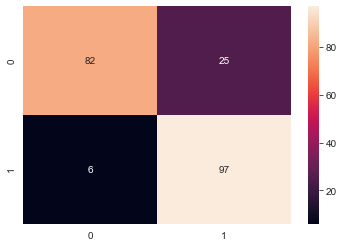

In [124]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['SVM',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

### a.ROC AUC Curve

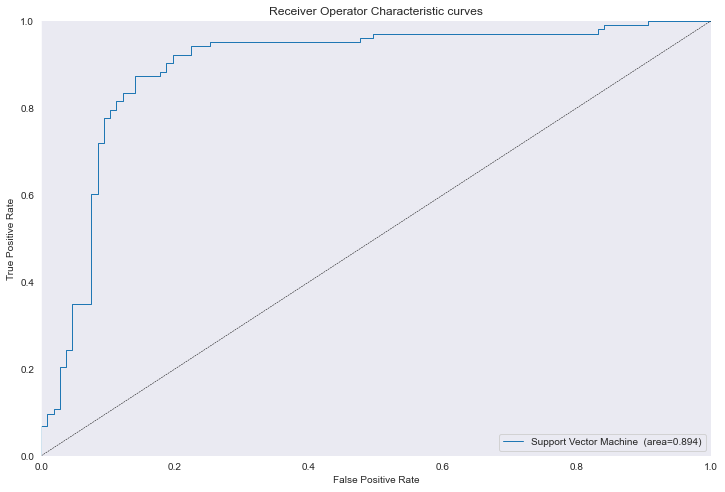

In [125]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,svc.predict_proba(X_test),label='Support Vector Machine ',l='-')


ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

## b.Precision Recall curve

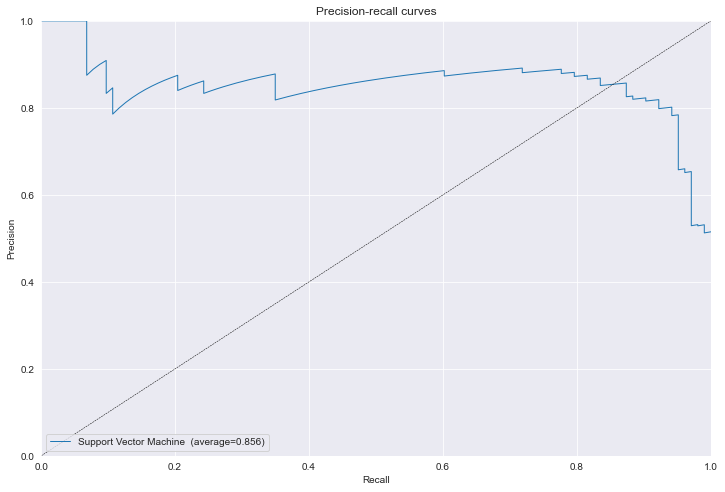

In [126]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(12,8))

precision_recall_plot(y_test,svc.predict_proba(X_test),label='Support Vector Machine ',l='-')


ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',)
        
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

## 11.Save Model:

In [127]:
import pickle

In [128]:
output=open("skillenza.pickle","wb")

In [129]:
pickle.dump(pipe,output)